### Important librairies

In [211]:
#Imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import Image
from lxml import objectify
import math
%matplotlib inline

#Convert country name to ISO-3
import country_converter as coco

#World map plot librairies
import plotly.offline as po
import plotly.graph_objs as pg

# Analysis of the lexical fields
from empath import Empath 

#Warnings
import warnings

data_folder = './data/'

## 1) Data handling

### Import and handling of the dataset


#### Movie metadata

In [56]:
### Movie metadata import
df_movie = pd.read_table(data_folder +'movie.metadata.tsv',header=None)
df_movie.columns=['Wikipedia_movie_ID' , 'Freebase_movie_ID', 'Movie_name' , 'Movie_date' , 'Movie_revenue' , 'Movie_runtime' , 'Movie_languages' , 'Movie_countries' , 'Movie_genres']
df_movie['Movie_countries'] = df_movie['Movie_countries'].apply( lambda x: list(eval(x).values())) #display countries as a list of country names
df_movie['Movie_genres'] = df_movie['Movie_genres'].apply( lambda x: list(eval(x).values()) ) #display genres as a list of genre name


#Movie metadata of american movies
df_movie_usa = df_movie.loc[df_movie['Movie_countries'].explode().isin(['United States of America'])[df_movie['Movie_countries'].explode().isin(['United States of America'])].index]
df_movie_usa

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_date,Movie_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...",[United States of America],"[Short Film, Silent film, Indie, Black-and-whi..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Musical, Comedy, Black-and-white]"
10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Drama, Black-and-white]"
...,...,...,...,...,...,...,...,...,...
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","[France, United States of America]","[Parody, Americana, Comedy]"
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},[United States of America],"[Thriller, Erotic thriller, Psychological thri..."
81727,24209227,/m/07k5mlk,"The Time, the Place and the Girl",1946,NaN,105.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Comedy film, Romance Film, Musical]"
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],[Drama]


#### Character metadata

In [5]:
### Character metadata import
df_character = pd.read_table(data_folder +'character.metadata.tsv',header=None)
df_character.columns=['Wikipedia_movie_ID' , 'Freebase_movie_ID' , 'Movie_date' , 'Character_name' , 'Actor_date_of_birth' , 'Actor_gender' , 'Actor_height' , 'Actor_ethnicity' , 'Actor_name' , 'Actor_age_at_movie_release' , 'Freebase_character_actor_ID' , 'Freebase_character_ID' , 'Freebase_actor_ID'  ]

#Correct negative or too high actor age
df_character['Actor_age_at_movie_release']=df_character['Actor_age_at_movie_release'].apply(lambda x: -x if x<0 else x)
df_character['Actor_age_at_movie_release']=df_character['Actor_age_at_movie_release'].apply(lambda x: float("nan") if x>130 else x)

#Character metadata of american movies
df_character_usa = df_character.merge(df_movie_usa['Freebase_movie_ID'], on='Freebase_movie_ID')
df_character_usa.to_csv('df_character_usa.csv',index=False)
df_character_usa

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_movie_release,Freebase_character_actor_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244235,30553937,/m/0g9ts5h,1998-03-07,Restaurant Manager,NaN,M,NaN,NaN,Randy Harris,NaN,/m/0jxtsx5,/m/0jxtsx8,/m/0jxtsxh
244236,30553937,/m/0g9ts5h,1998-03-07,Julia,1975-10-10,F,NaN,NaN,Natalie Ramsey,22.0,/m/0jxtsw7,/m/0jxtswb,/m/027dt0m
244237,7223293,/m/0kv0xs,1925,NaN,1894-02-28,M,NaN,NaN,Sid Smith,NaN,/m/02vcw0s,NaN,/m/02qrq5t
244238,9971909,/m/02pygw1,1972-09-22,NaN,1938-11-26,M,NaN,NaN,Rich Little,33.0,/m/02vbk4r,NaN,/m/03m6t5


#### Movie summary

In [4]:
#Dataframe with existing movie summary
wiki_id_list = []
for ctr,wiki_id in enumerate(list(df_movie_usa['Wikipedia_movie_ID'])) : 
    path = data_folder+'/corenlp_plot_summaries/'+str(wiki_id)+'.xml'
    if os.path.exists(path):
        wiki_id_list.append(wiki_id)
wiki_id_series = pd.Series(wiki_id_list, name='Wikipedia_movie_ID',dtype=object)

#Data frame (movie metadata) with only existing summaries 
df_movie_usa_summary=df_movie_usa.merge(wiki_id_series, on='Wikipedia_movie_ID')


#Data frame (character metadata) with only existing summaries
df_character_usa_summary=df_character_usa.merge(wiki_id_series, on='Wikipedia_movie_ID')


In [5]:
#Summary exploration
df=df_movie_usa_summary

#Initialization
lexicon = Empath()
df_lex_fields = pd.DataFrame()
dic_lex_fields=dict.fromkeys(df['Wikipedia_movie_ID'].values,[])

for ctr,movie in enumerate(list(df['Wikipedia_movie_ID'].values)) :

    path = data_folder+'/corenlp_plot_summaries/'+str(movie)+'.xml'
    if os.path.exists(path):
        #Extract dataframe from xml file and convert it into a dataframe
        df_summary=pd.DataFrame()
        df_summary = pd.read_xml(data_folder+'/corenlp_plot_summaries/'+str(movie)+'.xml' , xpath='//token',parser='lxml')
        df_summary.rename(columns={'id':'word_id'},inplace=True)
        df_summary.insert(0, "sentence_id",df_summary['word_id'].ne(df_summary['word_id'].shift()+1).cumsum(), True) #add sentence id by indexing sequences  
        
        ###Lexical field analysis
        summary_words=list(df_summary['word'].values) #all words of the summary in a list
        summary_words=[str(word) for word in summary_words] #convert all words to a string
        features_lex_fields = pd.Series([lexicon.analyze(list(summary_words), categories = ["feminine","sexist","sexiest","beauty","beautiful","positive_emotion","negative_emotion"])])
        #Store data into a dictionnary
        dic_lex_fields[movie]= features_lex_fields[0]
        #Add a column corresponding to the number of words in the summary
        dic_lex_fields[movie]['Number_of_words']=len(df_summary)
        
        
        
        ###Count of he/she        
        #Filter only the pronouns
        df_summary_pronouns= df_summary[df_summary.POS=='PRP']
        #Count the number of redundant words 
        personal_pronouns = df_summary_pronouns.groupby(['word'])['word'].count().sort_values(ascending=False)

        if 'he' in list(personal_pronouns.index):
            dic_lex_fields[movie]['he_count'] = personal_pronouns['he']
        else:
            dic_lex_fields[movie]['he_count'] = 0

        if 'she' in list(personal_pronouns.index):
            dic_lex_fields[movie]['she_count'] = personal_pronouns['she'] 
        else:
            dic_lex_fields[movie]['she_count'] = 0
        
        
        
        ###Principal characters according to the summary
        characters_name = df_summary[df_summary['NER'] == 'PERSON']['word'].value_counts().index
        if len(characters_name)>=2:
            dic_lex_fields[movie]['Principal_summary_character'] =  characters_name[0] 
            dic_lex_fields[movie]['Secondary_summary_character'] =  characters_name[1] 
        if len(characters_name)==1:
            dic_lex_fields[movie]['Principal_summary_character'] =  characters_name[0] 
            dic_lex_fields[movie]['Secondary_summary_character'] =  float('nan')    
        if len(characters_name)==0:
            dic_lex_fields[movie]['Principal_summary_character'] =  float('nan')
            dic_lex_fields[movie]['Secondary_summary_character'] =  float('nan')   

df_lex_fields = pd.DataFrame.from_dict(dic_lex_fields, orient='index')  
#df_lex_fields.insert(loc=0, column='Movie_name', value=df['Movie_name'].values)
df_lex_fields.insert(loc=1, column='Freebase_movie_ID', value=df['Freebase_movie_ID'].values)
df_usa_summary_processed=df_movie_usa_summary.merge(df_lex_fields, on='Freebase_movie_ID')
df_usa_summary_processed


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_date,Movie_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,feminine,...,sexiest,beauty,beautiful,positive_emotion,negative_emotion,Number_of_words,he_count,she_count,Principal_summary_character,Secondary_summary_character
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",1.0,...,0.0,0.0,0.0,0.0,7.0,396,1,0,Ballard,Williams
1,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Romantic comedy, Ensemble Film, Comedy-drama,...",3.0,...,0.0,0.0,0.0,2.0,2.0,257,2,5,Adam,Kate
2,11250635,/m/02r52hc,The Mechanical Monsters,NaN,NaN,NaN,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Science Fiction, Adventure, Animation, Short ...",1.0,...,0.0,1.0,0.0,0.0,3.0,707,4,2,Lois,Clark
3,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Children's/Family, Musical, Fantasy, Comedy, ...",1.0,...,0.0,1.0,0.0,8.0,5.0,1678,12,7,Mary,Banks
4,21926710,/m/05p45cv,White on Rice,2009,NaN,82.0,{},[United States of America],"[Romantic comedy, Romance Film, Comedy, Indie]",1.0,...,0.0,1.0,0.0,2.0,0.0,125,3,0,Jimmy,Tak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20784,7761830,/m/0kvgqb,Spaced Invaders,1990,15369573.0,100.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Alien Film, Science Fiction, Family Film, Com...",0.0,...,0.0,0.0,0.0,2.0,4.0,639,1,0,Bipto,Wrenchmuller
20785,26044505,/m/0b6m67n,The Flying Serpent,1946,NaN,59.0,{},[United States of America],"[Thriller, B-movie, Horror]",0.0,...,0.0,0.0,0.0,0.0,3.0,37,1,0,Andrew,Forbes
20786,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","[France, United States of America]","[Parody, Americana, Comedy]",1.0,...,0.0,0.0,0.0,2.0,1.0,252,1,1,Carla,Walt
20787,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},[United States of America],"[Thriller, Erotic thriller, Psychological thri...",1.0,...,0.0,0.0,0.0,1.0,9.0,611,6,8,Greenhill,Haines


In [6]:
#df=df_movie_usa.merge(df_usa_summary_processed, on=['Wikipedia_movie_ID','Freebase_movie_ID','Movie_name','Movie_date','Movie_revenue','Movie_runtime','Movie_languages','Movie_countries','Movie_genres'], how='outer')
df=df_movie_usa.merge(df_usa_summary_processed, on=['Wikipedia_movie_ID','Freebase_movie_ID','Movie_name','Movie_date','Movie_revenue','Movie_runtime','Movie_languages'], how='outer')
df.drop('Movie_genres_y', inplace=True, axis=1)
df.drop('Movie_countries_y', inplace=True, axis=1)
df.rename(columns={"Movie_genres_x": "Movie_genres", "Movie_countries_x": "Movie_countries"},inplace=True)

#Export final dataframe for movie metadata
df.to_csv('df_movie_usa.csv')


In [47]:
#Identify if the principal character from summary is a men or a women?
df1=pd.read_csv('df_movie_usa.csv')
df2=pd.read_csv('df_character_usa.csv')
sex=[]
for ctr,movie_id in enumerate(df1['Freebase_movie_ID']):
    #All characters of the movie
    characters_serie=df2[df2.Freebase_movie_ID== movie_id]['Character_name']
    characters=df2[df2.Freebase_movie_ID== movie_id ]['Character_name'].values
    characters=[str(word) for word in characters] #convert all words to a string

    #Principal character of the movie (from the summary)
    principal_character=df1[df1.Freebase_movie_ID== movie_id]['Principal_summary_character'].values[0]
    principal_character=str(principal_character)

    if (principal_character== 'nan') or (principal_character== 'Nan') or (principal_character== 'NaN'):
        character_sex = float('nan')
        sex.append(character_sex) #nan is assigned when no principal character is found
    
    else:
        for ctr,char in enumerate(characters):
            character_sex= float('nan')
            if principal_character.lower() in char.lower():
                index_character= characters_serie[characters_serie==char].index[0] #index of the matched character
                character_sex= df2.iloc[index_character]['Actor_gender']  #the sex of the matched character is assigned
                break
        sex.append(character_sex)

df1['Principal_character_sex']=sex
df1.to_csv('df_movie_usa.csv',index=False)

#### Import CSV

In [64]:
df_movie_usa=pd.read_csv('df_movie_usa.csv')
df_character_usa=pd.read_csv('df_character_usa.csv')


!!! AFFICHER LES DEUX DATASET ET LES DECRIRE EN TEXTE !!!

## 2) Focus on the USA

It is important to notice that for each movies, several countries name are specified. We consider each of these countries as country of origin of the movie. Thus, the total number of occurences is much larger than the total number of movies 

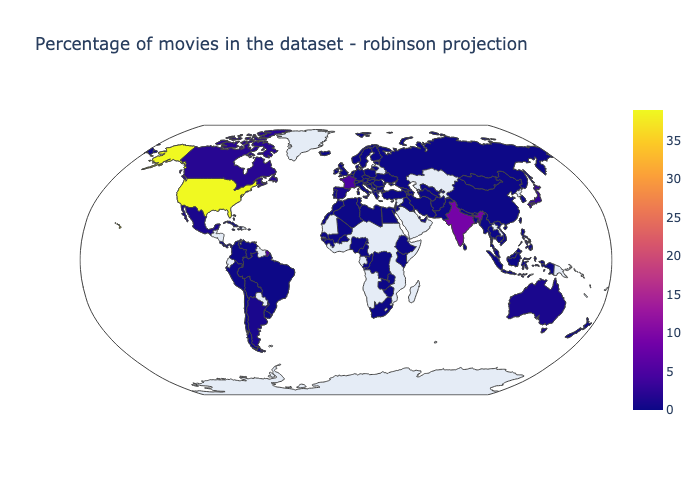

In [10]:
Image("img/world_map.png")

We see unequivocally that the main country of origin of the movies is the USA with 39% of all the occurences. The second main country is India with 9% of all the occurences. This great difference leads us to focus our study on the USA. In fact, we want to see a time evolution of the representation of women. From this, it is important to restrict the area of study to one country so that we remove the differences in the history of the different countries. Furthemore, as the history of the USA is well documented, we could try to link our results to importants events or social phenomena.

## 3) Data processing

### 3.1) Numerical data processing

#### Number of movies by decade

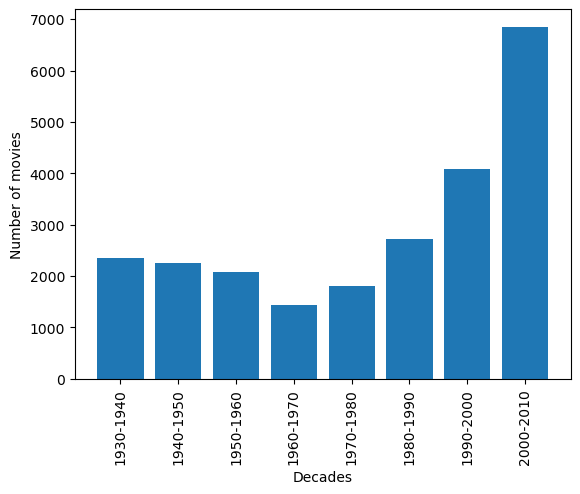

In [54]:
df=pd.read_csv('df_movie_usa.csv')

#List of string
years= ['1930','1940','1950','1960','1970','1980','1990','2000','2010']
decades= ['1930-1940','1940-1950','1950-1960','1960-1970','1970-1980','1980-1990','1990-2000','2000-2010']
#Initialisation of the deacde dictionnary
dic_movie_decades = dict.fromkeys(decades)
for ctr in range(len(years)-1):
    decade_str=years[ctr]+'-'+years[ctr+1]
    dic_movie_decades[decade_str]={'dataframe' : df[ (df.Movie_date > years[ctr]) & (df.Movie_date < years[ctr+1])] ,
                                   'occurences': len(df[ (df.Movie_date > years[ctr]) & (df.Movie_date < years[ctr+1])] )}

#Plot of the number of movie
data=[dic_movie_decades[decade]['occurences'] for decade in decades]
plt.bar( x=range(len(decades)) , height=data , tick_label=decades) 
plt.xticks( rotation=90 )
plt.xlabel('Decades')
plt.ylabel('Number of movies')
plt.show()

#### Number of movies by genre and decade

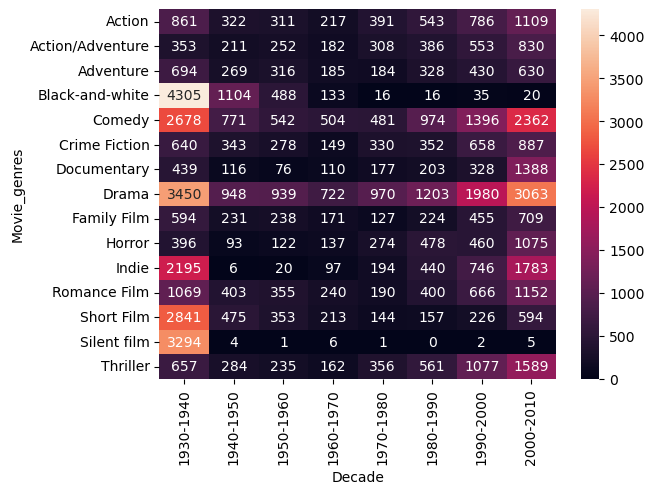

In [145]:
df1=df_movie_usa.copy()

#Add a column decade to assign each movie to a decade
decades = ['1930-1940','1940-1950','1950-1960','1960-1970','1970-1980','1980-1990','1990-2000','2000-2010']
decades_code = range(len(decades))
df1['Decade'] = 0
for ctr,decade in enumerate(decades):
    index1 = df1[ (df1['Movie_date']>decade[0:3]) & (df1['Movie_date']<decade[5:8])].index
    df1.loc[index1,'Decade'] = decades_code[ctr]

#Create a dataframe for genre and a dataframe for decade  
df_genre_explode = pd.DataFrame(df1['Movie_genres'].explode())
df_decade = pd.DataFrame(df1['Decade'])

#Main genres
main_genres = df_genre_explode['Movie_genres'].value_counts()
main_genres = main_genres[main_genres>2000] #We assume main genre when the total number of movies is higher than 2000

#Merge genre and decade dataframes
df = pd.merge(df_genre_explode, df_decade, left_index=True, right_index=True)
#Filter with main genres
df = df[df.Movie_genres.isin(main_genres.index)]
#Create a crosstab dataframe
df3 = pd.crosstab(df['Movie_genres'],df['Decade'])
#Plot heatmap
sns.heatmap( df3, annot=True , fmt='.4g'  , xticklabels=decades )
plt.show()


#### Age of men and women in movies by decade

In [167]:
df1=pd.read_csv('df_movie_usa.csv')
df2=pd.read_csv('df_character_usa.csv')

#Add a column decade to assign each movie to a decade
decades= ['1930-1940','1940-1950','1950-1960','1960-1970','1970-1980','1980-1990','1990-2000','2000-2010']
decades_code=range(len(decades))
df1['Decade'],df2['Decade']=0,0
for ctr,decade in enumerate(decades):
    index1 = df1[ (df1['Movie_date']>decade[0:3]) & (df1['Movie_date']<decade[5:8])].index
    df1.loc[index1,'Decade']= decades_code[ctr]
    index2 = df2[ (df2['Movie_date']>decade[0:3]) & (df2['Movie_date']<decade[5:8])].index
    df2.loc[index2,'Decade']= decades_code[ctr]






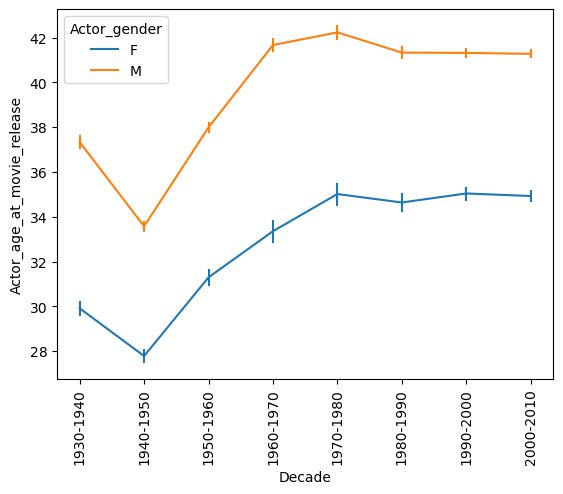

In [164]:
df=pd.read_csv('df_character_usa.csv')

sns.lineplot(data=df, x='Decade', y='Actor_age_at_movie_release', estimator='mean', hue='Actor_gender' , err_style='bars')
plt.xticks(ticks=decades_code,labels=decades,rotation=90)
plt.show()

#### Part of women in movies by decade

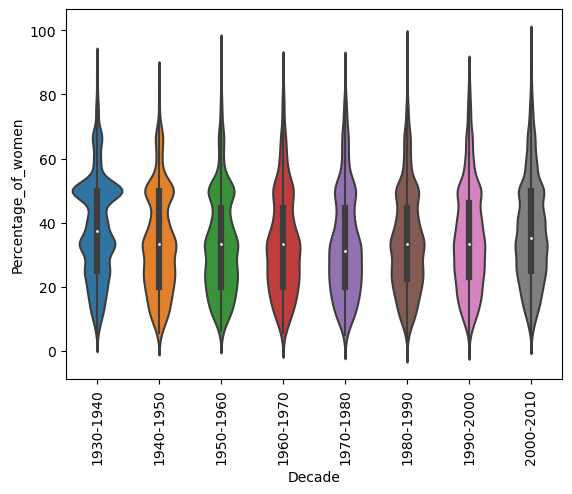

In [193]:
df1=pd.read_csv('df_movie_usa.csv')
df2=pd.read_csv('df_character_usa.csv')

men_by_movie= df2[df2['Actor_gender']=='M'].groupby('Freebase_movie_ID')['Actor_gender'].agg('count')
women_by_movie= df2[df2['Actor_gender']=='F'].groupby('Freebase_movie_ID')['Actor_gender'].agg('count')
percentage_women_by_movie=  pd.Series((women_by_movie/(men_by_movie+women_by_movie))*100,name='Percentage_of_women')
df_movie_percentage_women=df1.merge(percentage_women_by_movie, on='Freebase_movie_ID')



#Plot
#sns.violinplot(data=df1, x='Decade', y='Percentage_of_women')
sns.violinplot(data=df_movie_percentage_women, x='Decade', y='Percentage_of_women')
plt.xticks(ticks=decades_code,labels=decades,rotation=90)
plt.show()

#### Linear regression: what influences the percentage of women?

### 3.2) Lexical data processing

#### Principal character

From each summary, we extract the number of occurences of each character (see Part1). Thus, we assume that the principal character is the most quoted in the plot summary. For example, this is the analysis of Avatar summary:

<img src="img/principal_character.png" width=300 height=100 />

Thus, for each movies with a summary, a principal and secondary character are identified. Then, we want to know if the principal character is a man or a woman. To do that, the summary extracted principal character are compared to the characters of the dataset containing information about characters (see Part1). Then, the movie metadata dataset is enriched with this information. We assigned nan values when the movie does not have a summary.

In [54]:
df=pd.read_csv('df_movie_usa.csv')
df[['Freebase_movie_ID','Movie_name','Movie_date','Principal_summary_character','Principal_character_sex','Secondary_summary_character']].head(10)

,Freebase_movie_ID,Movie_name,Movie_date,Principal_summary_character,Principal_character_sex,Secondary_summary_character
0,/m/03vyhn,Ghosts of Mars,2001-08-24,Ballard,F,Williams
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,NaN,NaN
2,/m/03cfc81,The Gangsters,1913-05-29,NaN,NaN,NaN
3,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,NaN,NaN,NaN
4,/m/017n1p,Sarah and Son,1930,NaN,NaN,NaN
5,/m/0gffwj,Little city,1997-04-04,Adam,NaN,Kate
6,/m/02r52hc,The Mechanical Monsters,NaN,Lois,NaN,Clark
7,/m/0kcn7,Mary Poppins,1964-08-27,Mary,F,Banks
8,/m/0gj30jx,Keep the Change,1992,NaN,NaN,NaN
9,/m/017n1b,The Devil's Holiday,1930,NaN,NaN,NaN


We want to analyze if the principal character of a movie is a man or a woman. 

In [53]:
df=pd.read_csv('df_movie_usa.csv')
df_men = df[df['Principal_character_sex']=='M']
df_women = df[df['Principal_character_sex']=='F']
print(len(df_men))
print(len(df_women))

6096
2756


#### Lexical field

In each summary plot, we analyze the occurences of specific lexical fields. 
The lexical fields are: feminine, sexist, sexiest, beauty, beautiful, positive_emotion, negative_emotion.
These lexical fields are chosen arbitrary for the moment but will be further investgated in the future.
Also, the number of words in each summary is extracted.

In [58]:
df=pd.read_csv('df_movie_usa.csv')
df[['Freebase_movie_ID','Movie_name','Movie_date',"feminine","sexist","sexiest","beauty","beautiful","positive_emotion","negative_emotion",'Number_of_words']].head(10)

,Freebase_movie_ID,Movie_name,Movie_date,feminine,sexist,sexiest,beauty,beautiful,positive_emotion,negative_emotion,Number_of_words
0,/m/03vyhn,Ghosts of Mars,2001-08-24,1.0,0.0,0.0,0.0,0.0,0.0,7.0,396.0
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/m/03cfc81,The Gangsters,1913-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/m/017n1p,Sarah and Son,1930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,/m/0gffwj,Little city,1997-04-04,3.0,0.0,0.0,0.0,0.0,2.0,2.0,257.0
6,/m/02r52hc,The Mechanical Monsters,NaN,1.0,0.0,0.0,1.0,0.0,0.0,3.0,707.0
7,/m/0kcn7,Mary Poppins,1964-08-27,1.0,0.0,0.0,1.0,0.0,8.0,5.0,1678.0
8,/m/0gj30jx,Keep the Change,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,/m/017n1b,The Devil's Holiday,1930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=pd.read_csv('df_movie_usa.csv')

#### Count of he/she pronoun

In each summary plot, we analyze the occurences of the pronoun he and she. The goal is to see if one pronoun or the other is more often used. We could assume that the number of occurences informs us about the importance of one gender to another in the summary.

In [60]:
df=pd.read_csv('df_movie_usa.csv')
df[['Freebase_movie_ID','Movie_name','Movie_date','he_count','she_count','Number_of_words']]

,Freebase_movie_ID,Movie_name,Movie_date,he_count,she_count,Number_of_words
0,/m/03vyhn,Ghosts of Mars,2001-08-24,1.0,0.0,396.0
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,NaN,NaN
2,/m/03cfc81,The Gangsters,1913-05-29,NaN,NaN,NaN
3,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,NaN,NaN,NaN
4,/m/017n1p,Sarah and Son,1930,NaN,NaN,NaN
...,...,...,...,...,...,...
34403,/m/0660qx,State and Main,2000-08-26,1.0,1.0,252.0
34404,/m/030xw6,Guilty as Sin,1993-06-04,6.0,8.0,611.0
34405,/m/07k5mlk,"The Time, the Place and the Girl",1946,NaN,NaN,NaN
34406,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,0.0,0.0,118.0


### 3.3) Google trends